In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import os
import cv2 as cv
from tqdm.notebook import tqdm_notebook
from yolov7_package import Yolov7Detector

In [29]:
import pip

def import_or_install(package_name, package_import_name):
    try:
        __import__(package_import_name)
        print(f'{package_name} already installed')
    except ImportError:
        print(f'Installing {package_name}')
        pip.main(['install', package_name]) 

In [30]:
import_or_install('yolov7-package', 'yolov7_package')

yolov7-package already installed


In [31]:
dataset = datasets.ImageFolder('/home/student/notebooks/YOLOv7/explore')

In [32]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32)

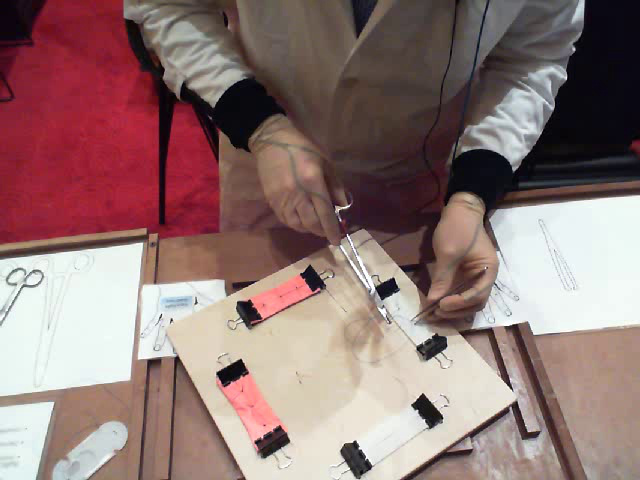

In [33]:
dataset[10][0]

In [40]:
def get_y_pred_and_y_true():
    y_pred, y_true = [], []
    labels = open('YOLOv7/classes.names').read().strip().split('\n')
    model = Yolov7Detector(weights='yolov7/runs/train/yolov7-cvor9/weights/best.pt', img_size=[416, 416], classes='YOLOv7/classes.names')
    
    for file in tqdm_notebook(os.listdir('YOLOv7/test/images')):
        # normalize as in detect from yolov7_package
        frame = cv.imread(f'YOLOv7/test/images/{file}')
        
        img_shape = frame.shape
        w_img = img_shape[1]
        h_img = img_shape[0]
        
        # y_true
        labels_filename = file.split('.')[0]
        classes, boxes, scores = [], [], []
        with open (f'YOLOv7/test/labels/{labels_filename}.txt', 'r') as f:
            for line in f:
                line = line.split()
                
                class_id = int(line[0])
                
                x_cnt  = float(line[1])*w_img
                y_cnt  = float(line[2])*h_img
                w_bbox = float(line[3])*w_img
                h_bbox = float(line[4])*h_img                
                
                xmin = x_cnt - w_bbox/2
                ymin = y_cnt - h_bbox/2
                xmax = xmin  + w_bbox
                ymax = ymin  + h_bbox
                
                classes.append(class_id)
                boxes.append([xmin, ymin, xmax, ymax])
                scores.append(1)
            img = model.draw_on_image(frame, boxes, scores, classes)
            cv.imwrite(f'models/results/DE_{labels_filename}.jpg', frame)

In [41]:
get_y_pred_and_y_true()

Fusing layers... 
IDetect.fuse


  0%|          | 0/199 [00:00<?, ?it/s]

In [5]:
labels = {0: ['right', 'scissors'], 1: ['left', 'scissors'], 2: ['right', 'needle_driver'], 3: ['left', 'needle_driver'],
         4: ['right', 'forceps'], 5: ['left', 'forceps'], 6: ['right', 'empty'], 7: ['left', 'empty']}

In [22]:
train_df = pd.DataFrame(columns = ["frame", "hand", "tool"])
valid_df = pd.DataFrame(columns = ["frame", "hand", "tool"])
test_df = pd.DataFrame(columns = ["frame", "hand", "tool"])

In [23]:
datasets = {'train': train_df, 'valid': valid_df, 'test': test_df}

In [29]:
for dataset in datasets:
    for file in os.listdir(f'/home/student/notebooks/YOLOv7/{dataset}/labels/'):
        if file.split('.')[1] == 'txt':
            with open (f'/home/student/notebooks/YOLOv7/{dataset}/labels/{file}', 'r') as f: 
                for line in f:
                    datasets[dataset] = datasets[dataset].append({'frame': file, 'hand': labels[int(line[0])][0], 'tool': labels[int(line[0])][1]}, ignore_index=True)

/tmp/ipykernel_4829/3852589422.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets[dataset] = datasets[dataset].append({'frame': file, 'hand': labels[int(line[0])][0], 'tool': labels[int(line[0])][1]}, ignore_index=True)
/tmp/ipykernel_4829/3852589422.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets[dataset] = datasets[dataset].append({'frame': file, 'hand': labels[int(line[0])][0], 'tool': labels[int(line[0])][1]}, ignore_index=True)
/tmp/ipykernel_4829/3852589422.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets[dataset] = datasets[dataset].append({'frame': file, 'hand': labels[int(line[0])][0], 'tool': labels[int(line[0])][1]}, ignore_index=True)
/tmp/ipykernel_4829/3852589422.py:6: Future

In [33]:
datasets['train'].groupby(['hand', 'tool']).size())

hand   tool         
left   empty            635
       forceps          329
       needle_driver     45
       scissors           2
right  empty             84
       needle_driver    672
       scissors         239
dtype: int64

Text(0, 0.5, 'count')

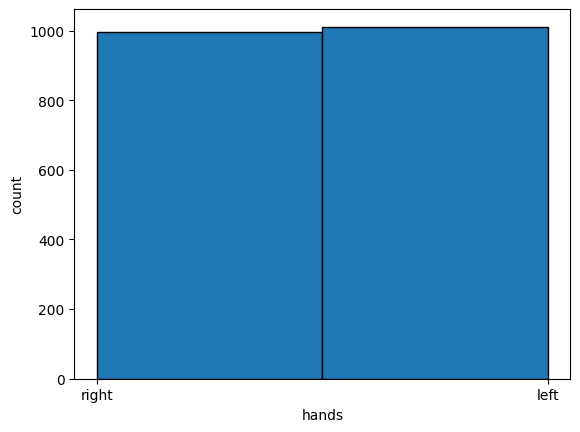

In [41]:
plt.hist(datasets['train']['hand'], bins=2, edgecolor='black')
plt.xlabel('hands')
plt.ylabel('count')

(array([[ 995.,    0., 1011.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,  717.,    0.,  329.,    0.,  241.,
          719.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 BarContainer objects>)

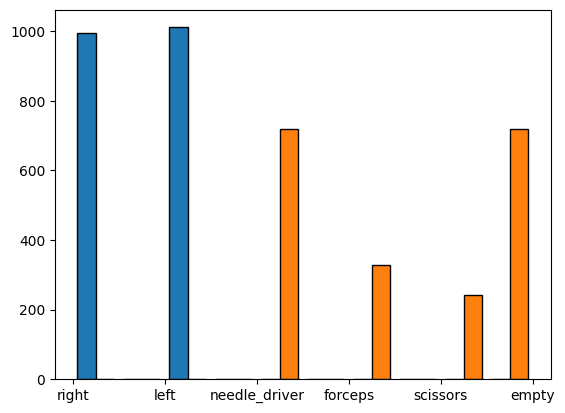

In [48]:
plt.hist(datasets['train'][['hand','tool']], bins=10, edgecolor='black')

(array([[132.,   0., 131.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  89.,   0., 101.,   0.,  29.,  44.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 BarContainer objects>)

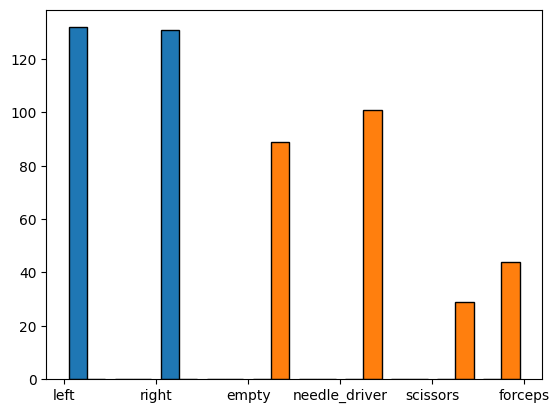

In [49]:
plt.hist(datasets['valid'][['hand','tool']], bins=10, edgecolor='black')

(array([[199.,   0., 199.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  62.,   0., 147.,   0., 146.,  43.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 BarContainer objects>)

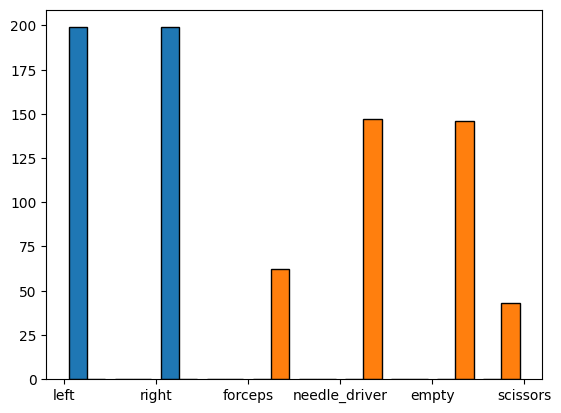

In [50]:
plt.hist(datasets['test'][['hand','tool']], bins=10, edgecolor='black')

In [52]:
datasets['train'].plot.hist(column=['tool'], by='hand')

TypeError: no numeric data to plot